# Linear model for classification
In regression, we saw that the target to be predicted was a continuous
variable. In classification, this target will be discrete (e.g. categorical).

We will go back to our penguin dataset. However, this time we will try to
predict the penguin species using the culmen information. We will also
simplify our classification problem by selecting only 2 of the penguin
species to solve a binary classification problem.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [2]:
penguins = pd.read_csv("../datasets/penguins_classification.csv")
penguins

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
...,...,...,...
337,55.8,19.8,Chinstrap
338,43.5,18.1,Chinstrap
339,49.6,18.2,Chinstrap
340,50.8,19.0,Chinstrap


In [3]:
penguins.set_index("Species")

,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,39.1,18.7
Adelie,39.5,17.4
Adelie,40.3,18.0
Adelie,36.7,19.3
Adelie,39.3,20.6
...,...,...
Chinstrap,55.8,19.8
Chinstrap,43.5,18.1
Chinstrap,49.6,18.2


In [4]:
penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]]

,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,39.1,18.7
Adelie,39.5,17.4
Adelie,40.3,18.0
Adelie,36.7,19.3
Adelie,39.3,20.6
...,...,...
Chinstrap,55.8,19.8
Chinstrap,43.5,18.1
Chinstrap,49.6,18.2


In [5]:
penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

,Species,Culmen Length (mm),Culmen Depth (mm)
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6
...,...,...,...
214,Chinstrap,55.8,19.8
215,Chinstrap,43.5,18.1
216,Chinstrap,49.6,18.2
217,Chinstrap,50.8,19.0


In [6]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

We can quickly start by visualizing the feature distribution by class:

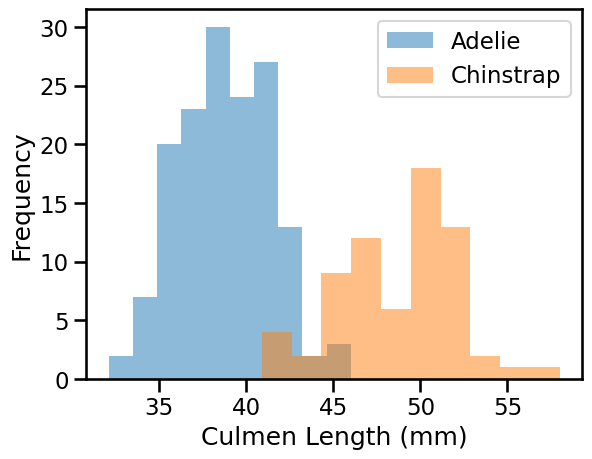

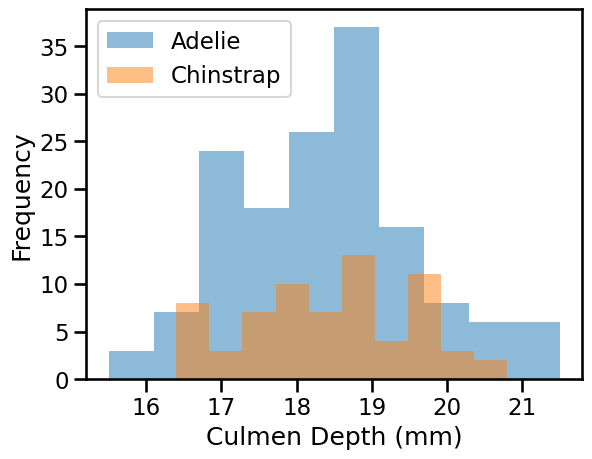

In [7]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We can observe that we have quite a simple problem. When the culmen
length increases, the probability that the penguin is a Chinstrap is closer
to 1. However, the culmen depth is not helpful for predicting the penguin
species.

For model fitting, we will separate the target from the data and
we will create a training and a testing set.

In [8]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [9]:
target_train[:5]

194    Chinstrap
4         Adelie
215    Chinstrap
92        Adelie
44        Adelie
Name: Species, dtype: object

In [10]:
data_train[:5]

,Culmen Length (mm),Culmen Depth (mm)
194,45.5,17.0
4,39.3,20.6
215,43.5,18.1
92,39.6,18.1
44,39.6,18.8



The linear regression that we previously saw will predict a continuous
output. When the target is a binary outcome, one can use the logistic
function to model the probability. This model is known as logistic
regression.

Scikit-learn provides the class `LogisticRegression` which implements this
algorithm.

In [11]:
import sklearn
sklearn.set_config(display="diagram")

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
kk=logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 1.000


C:\Users\MM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [13]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi


Since we are dealing with a classification problem containing only 2
features, it is then possible to observe the decision function boundary.
The boundary is the rule used by our predictive model to affect a class label
given the feature values of the sample.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>Here, we will use the class <tt class="docutils literal">DecisionBoundaryDisplay</tt>. This educational tool
allows us to gain some insights by plotting the decision function boundary
learned by the classifier in a 2 dimensional feature space.</p>
<p class="last">Notice however that in more realistic machine learning contexts, one would
typically fit on more than two features at once and therefore it would not be
possible to display such a visualization of the decision boundary in
general.</p>
</div>

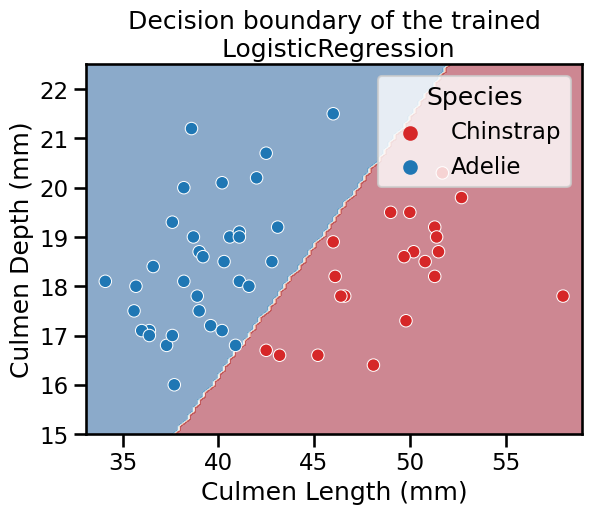

In [14]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

Thus, we see that our decision function is represented by a line separating
the 2 classes. We should also note that we did not impose any regularization
by setting the parameter `penalty` to `'none'`.

Since the line is oblique, it means that we used a combination of both
features:

In [15]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

In [16]:
coefs

array([10.57295179, -4.39030324])

In [17]:
weights

Culmen Length (mm)    10.572952
Culmen Depth (mm)     -4.390303
dtype: float64

In [18]:
logistic_regression[-1].coef_

array([[10.57295179, -4.39030324]])

In [19]:
logistic_regression[-1].intercept_

array([-5.20136416])

In [20]:
data_train[:5]

,Culmen Length (mm),Culmen Depth (mm)
194,45.5,17.0
4,39.3,20.6
215,43.5,18.1
92,39.6,18.1
44,39.6,18.8


In [21]:
target_train[:5]

194    Chinstrap
4         Adelie
215    Chinstrap
92        Adelie
44        Adelie
Name: Species, dtype: object

In [22]:
logistic_regression.classes_

array(['Adelie', 'Chinstrap'], dtype=object)

In [23]:
logistic_regression.predict_proba(data_train[:5])

array([[4.35880339e-04, 9.99564120e-01],
       [9.99999984e-01, 1.55169620e-08],
       [5.81526197e-01, 4.18473803e-01],
       [9.99671209e-01, 3.28790852e-04],
       [9.99976142e-01, 2.38583163e-05]])

In [24]:
logistic_regression.predict(data_train[:5])

array(['Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

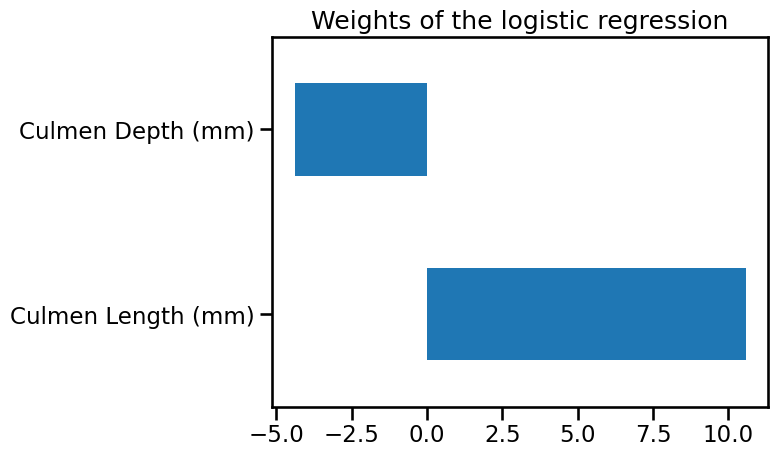

In [25]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

Indeed, both coefficients are non-null. If one of them had been zero, the
decision boundary would have been either horizontal or vertical.

Furthermore the intercept is also non-zero, which means that the decision does
not go through the point with (0, 0) coordinates.

For the mathematically inclined reader, the equation of the decision boundary
is:

    coef0 * x0 + coef1 * x1 + intercept = 0

where `x0` is `"Culmen Length (mm)"` and `x1` is `"Culmen Depth (mm)"`.

This equation is equivalent to (assuming that `coef1` is non-zero):

    x1 = coef0 / coef1 * x0 - intercept / coef1

which is the equation of a straight line.

In [32]:
import pickle
midterm_model = pickle.dumps(logistic_regression)

# open a file, where you want to store the data
file = open('midterm_model.pkl', 'wb')

# dump information to that file
pickle.dump(logistic_regression, file)

# close the file
file.close()


#### 채점은 이렇게 (채점용 데이터 이용)

In [33]:
import pickle

# open a file, where you stored the pickled data
file = open('midterm_model.pkl', 'rb')

# dump information to that file
restord_model = pickle.load(file)

# close the file
file.close()

In [28]:
accuracy = restord_model.score(data_test, target_test)
print(accuracy)

1.0


In [29]:
restord_model.predict_proba(data_train[:5])

array([[4.35880339e-04, 9.99564120e-01],
       [9.99999984e-01, 1.55169620e-08],
       [5.81526197e-01, 4.18473803e-01],
       [9.99671209e-01, 3.28790852e-04],
       [9.99976142e-01, 2.38583163e-05]])

In [30]:
restord_model.predict(data_train[:5])

array(['Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)